In [ ]:
import zipfile
import os

# Replace 'your_file.zip' with the name of your ZIP file
zip_filename = 'spaceship-titanic.zip'

# Unzip the file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# List the files extracted to verify
extracted_files = os.listdir('/content/')
print(extracted_files)


In [ ]:
import pandas as pd
df = pd.read_csv('test.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


              CryoSleep       Age       VIP  RoomService  FoodCourt  \
CryoSleep      1.000000 -0.048447 -0.074723    -0.275992  -0.219777   
Age           -0.048447  1.000000  0.056373     0.064097   0.111073   
VIP           -0.074723  0.056373  1.000000     0.066258   0.124005   
RoomService   -0.275992  0.064097  0.066258     1.000000  -0.030233   
FoodCourt     -0.219777  0.111073  0.124005    -0.030233   1.000000   
ShoppingMall  -0.242136  0.039249  0.039564     0.064501   0.027809   
Spa           -0.211110  0.108344  0.136020     0.006342   0.244851   
VRDeck        -0.189852  0.102743  0.089263    -0.032827   0.278152   

              ShoppingMall       Spa    VRDeck  
CryoSleep        -0.242136 -0.211110 -0.189852  
Age               0.039249  0.108344  0.102743  
VIP               0.039564  0.136020  0.089263  
RoomService       0.064501  0.006342 -0.032827  
FoodCourt         0.027809  0.244851  0.278152  
ShoppingMall      1.000000  0.003094  0.029857  
Spa              

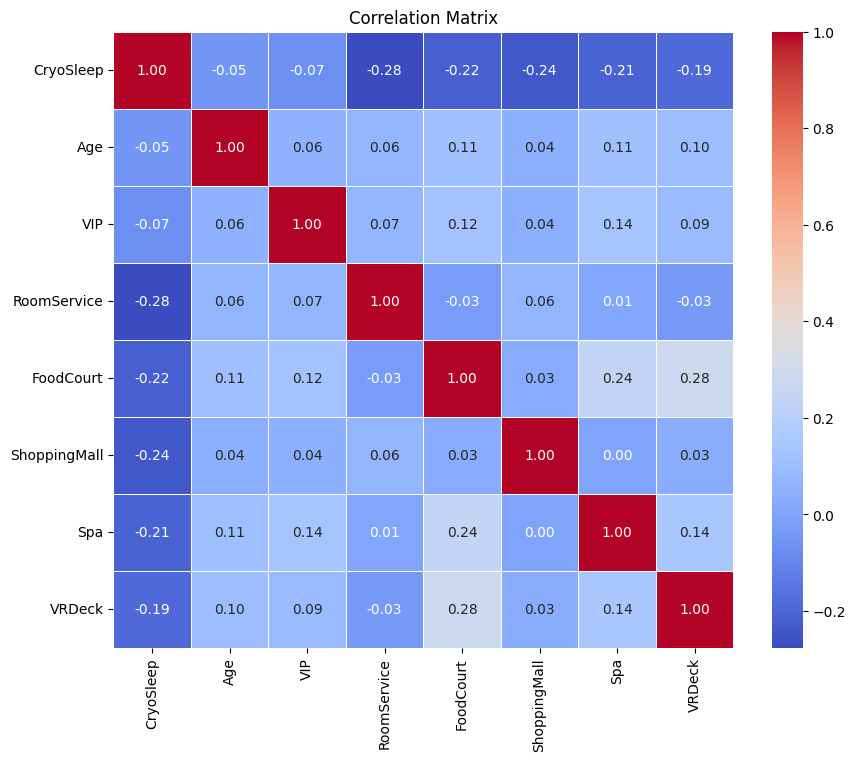

In [ ]:

df = df.drop(columns=["HomePlanet", "Cabin", "Destination", "Name","PassengerId"])

correlation_matrix = df.corr()

print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


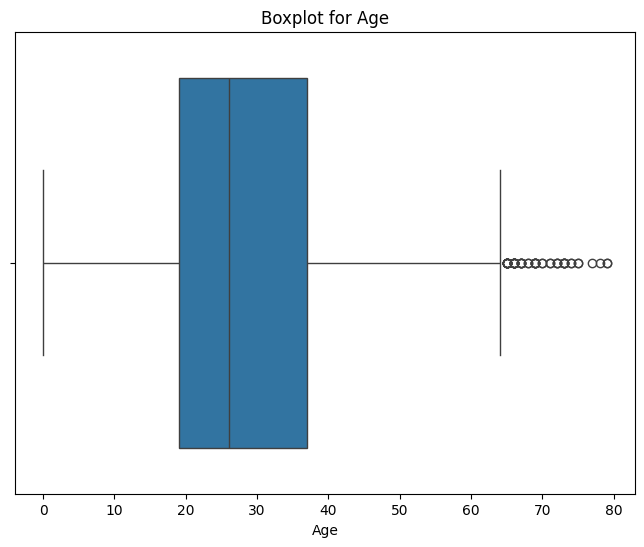

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

column_name = 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column_name])
plt.title(f'Boxplot for {column_name}')
plt.show()


In [ ]:
columns_of_interest = ['Age', 'VIP']

# Calculate the range for the column
selected_column_ranges = df[columns_of_interest].max() - df[columns_of_interest].min()

print(selected_column_ranges)

Age    79.0
VIP       1
dtype: object


##### Find **Missing Values and Outliers**

- **Missing data:** Detect missing values and decide how to handle them (e.g., removal, replacement, or imputation).

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.fillna({
    'Age': train_df['Age'].median(),
    'RoomService': train_df['RoomService'].median(),
    'FoodCourt': train_df['FoodCourt'].median(),
    'ShoppingMall': train_df['ShoppingMall'].median(),
    'Spa': train_df['Spa'].median(),
    'VRDeck': train_df['VRDeck'].median(),
    'CryoSleep': train_df['CryoSleep'].mode()[0],
    'HomePlanet': train_df['HomePlanet'].mode()[0],
    'Destination': train_df['Destination'].mode()[0],
}, inplace=True)

test_df.fillna({
    'Age': test_df['Age'].median(),
    'RoomService': test_df['RoomService'].median(),
    'FoodCourt': test_df['FoodCourt'].median(),
    'ShoppingMall': test_df['ShoppingMall'].median(),
    'Spa': test_df['Spa'].median(),
    'VRDeck': test_df['VRDeck'].median(),
    'CryoSleep': test_df['CryoSleep'].mode()[0],
    'HomePlanet': test_df['HomePlanet'].mode()[0],
    'Destination': test_df['Destination'].mode()[0],
}, inplace=True)

train_df = pd.get_dummies(train_df, columns=['HomePlanet', 'CryoSleep', 'Destination'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['HomePlanet', 'CryoSleep', 'Destination'], drop_first=True)

train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

train_df['Num'] = pd.to_numeric(train_df['Num'], errors='coerce')
test_df['Num'] = pd.to_numeric(test_df['Num'], errors='coerce')
train_df['Deck'] = train_df['Deck'].astype('category')
test_df['Deck'] = test_df['Deck'].astype('category')
train_df['Side'] = train_df['Side'].astype('category')
test_df['Side'] = test_df['Side'].astype('category')

train_df.fillna({
    'Num': train_df['Num'].median(),
}, inplace=True)
test_df.fillna({
    'Num': test_df['Num'].median(),
}, inplace=True)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

train_df.drop(columns=['Name', 'PassengerId'], inplace=True)
test_df.drop(columns=['Name', 'PassengerId'], inplace=True)

print("Preprocessing complete.")
train_df.info()
train_df.head()


<ipython-input-4-c7f5045fc7c9>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df.fillna({
<ipython-input-4-c7f5045fc7c9>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.fillna({


Preprocessing complete.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Cabin                      8494 non-null   object  
 1   Age                        8693 non-null   float64 
 2   VIP                        8490 non-null   object  
 3   RoomService                8693 non-null   float64 
 4   FoodCourt                  8693 non-null   float64 
 5   ShoppingMall               8693 non-null   float64 
 6   Spa                        8693 non-null   float64 
 7   VRDeck                     8693 non-null   float64 
 8   Transported                8693 non-null   bool    
 9   HomePlanet_Europa          8693 non-null   bool    
 10  HomePlanet_Mars            8693 non-null   bool    
 11  CryoSleep_True             8693 non-null   bool    
 12  Destination_PSO J318.5-22  8693 non-null   bool    
 13  Destinati

,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,Num,Side
0,B/0/P,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,True,B,0.000000,P
1,F/0/S,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,True,False,False,False,False,True,F,0.000000,S
2,A/0/S,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,False,True,False,False,False,True,A,0.000000,S
3,A/0/S,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,False,True,False,False,False,True,A,0.000000,S
4,F/1/S,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,True,False,False,False,False,True,F,0.000528,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


##Outlier detection: Use boxplots or methods like Interquartile Range (IQR) to identify outliers.

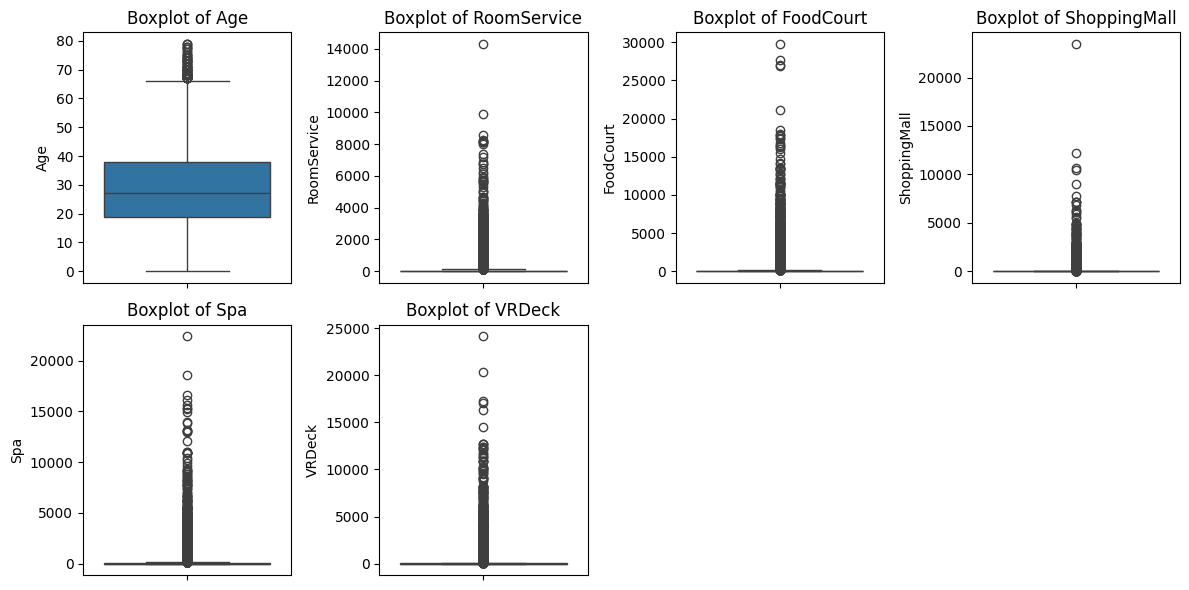

Number of outliers in Age: 77
Number of outliers in RoomService: 1861
Number of outliers in FoodCourt: 1823
Number of outliers in ShoppingMall: 1829
Number of outliers in Spa: 1788
Number of outliers in VRDeck: 1809
Outlier detection complete.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', ]

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(train_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    for column in numerical_columns:

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        print(f"Number of outliers in {column}: {outliers[column].shape[0]}")

    return outliers

outliers = detect_outliers_iqr(train_df, numerical_columns)


#train_df_cleaned = train_df[~train_df['Age'].isin(outliers['Age']['Age'])]     we can delate outlier data


print("Outlier detection complete.")


##### 2. **Data Complexity and Structure Analysis**

- **Dimensionality:** Evaluate the number of features relative to the number of samples. Determine whether dimensionality reduction techniques (PCA, t-SNE) are needed.

<ipython-input-8-ced6e9ec9fd3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Number of samples: 8693, Number of features: 6
Feature-to-Sample Ratio: 0.00


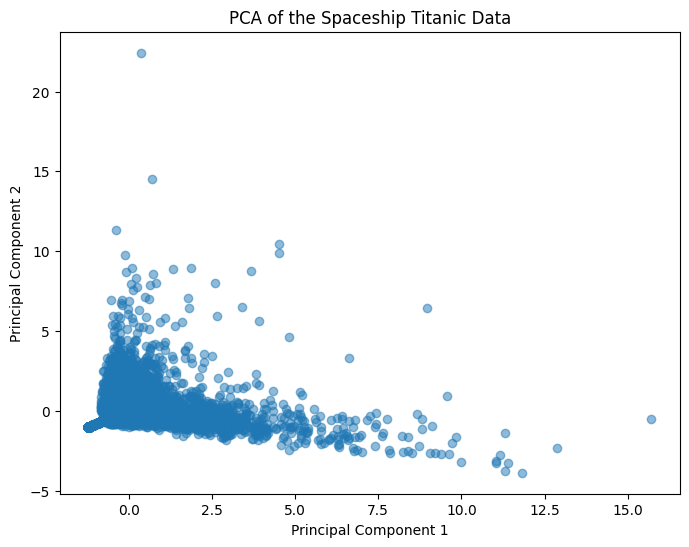

Explained Variance Ratio by PCA components: [0.24708135 0.18122649]


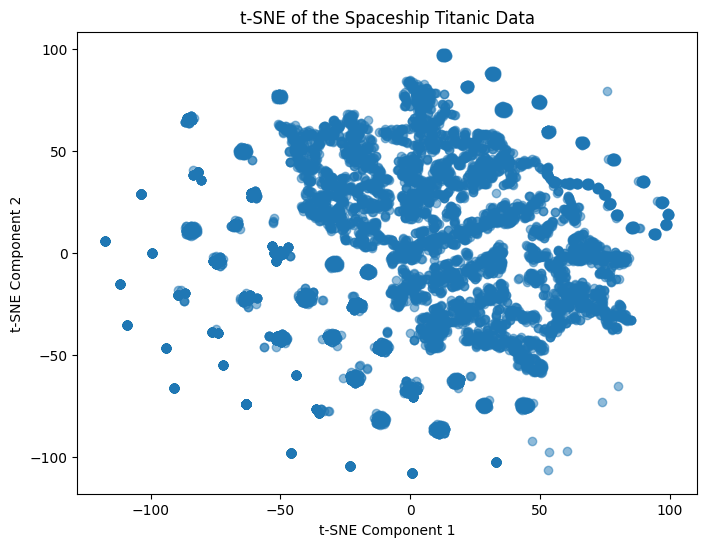

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv('train.csv')

numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]
X = train_df[numerical_columns]

X.fillna(X.median(), inplace=True)

n_samples, n_features = X.shape
print(f"Number of samples: {n_samples}, Number of features: {n_features}")
print(f"Feature-to-Sample Ratio: {n_features / n_samples:.2f}")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA of the Spaceship Titanic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print("Explained Variance Ratio by PCA components:", pca.explained_variance_ratio_)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title('t-SNE of the Spaceship Titanic Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Conclusion based on the visualizations:
# - If PCA shows well-separated clusters along the first two components, dimensionality reduction might not be needed.
# - If t-SNE shows clear clustering or grouping, it indicates potential for dimensionality reduction to enhance performance.


##Clusters: Use clustering algorithms (e.g., K-Means) to understand natural groupings or separations in the data.

<ipython-input-12-37bed753c79f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


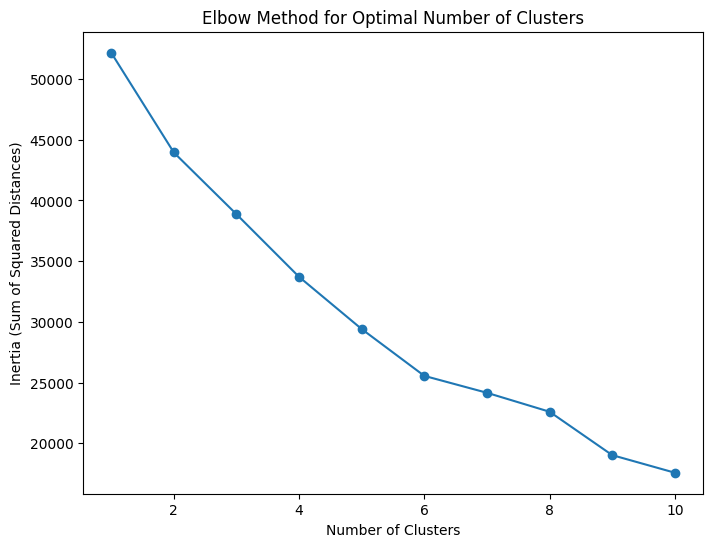

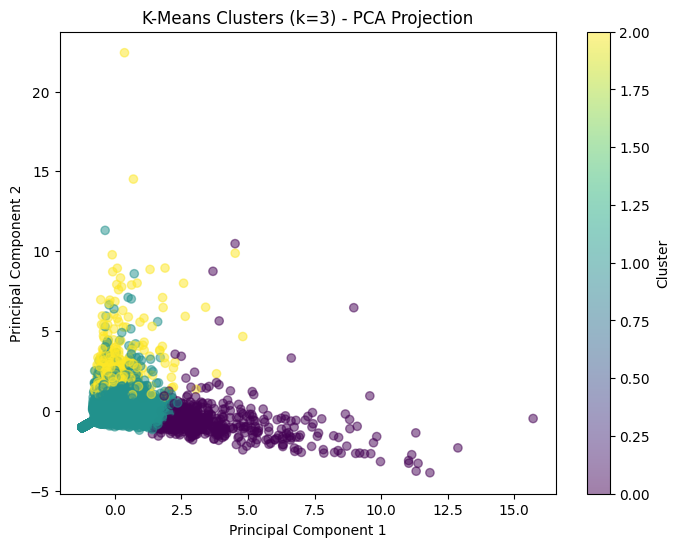

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 6)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', ]
X = train_df[numerical_columns]

X.fillna(X.median(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

train_df['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clusters (k={optimal_k}) - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

cluster_centers = pca.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (in original feature space):")
print(cluster_centers)


###DBSCAN

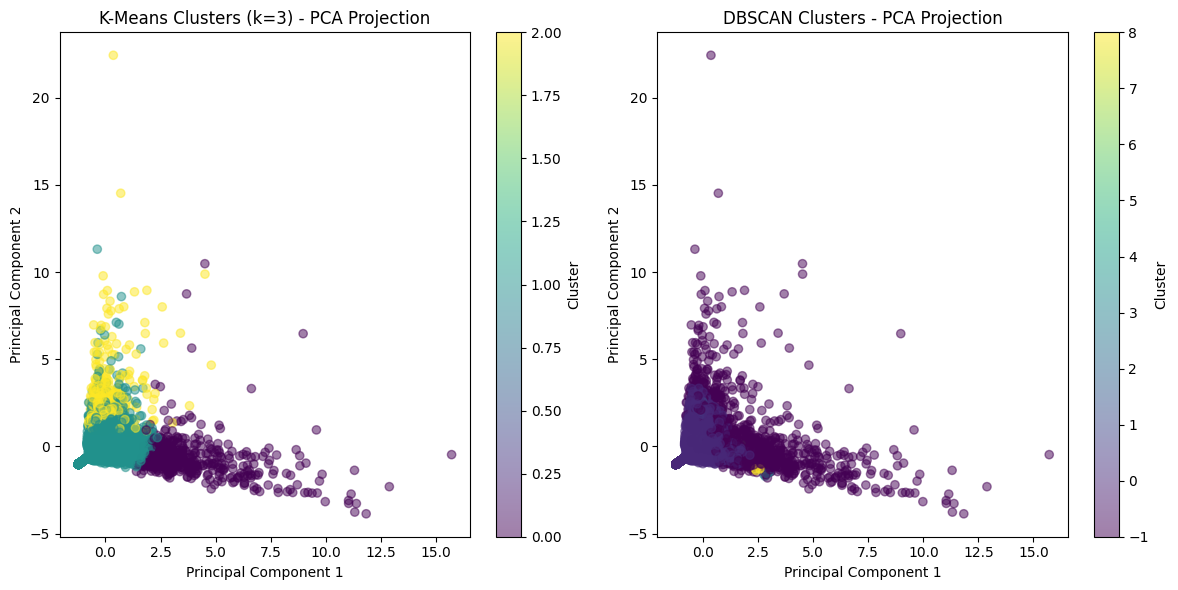

K-Means Cluster Sizes:
KMeans_Cluster
1    7805
0     505
2     383
Name: count, dtype: int64

DBSCAN Cluster Sizes:
DBSCAN_Cluster
 0    7660
-1     981
 1      13
 6       8
 4       7
 5       6
 3       5
 7       5
 8       5
 2       3
Name: count, dtype: int64

Summary of Clustering:
K-Means identified 3 clusters.
DBSCAN identified 9 clusters (ignoring noise points).


In [ ]:
from sklearn.cluster import KMeans, DBSCAN
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
train_df['KMeans_Cluster'] = kmeans.labels_

dbscan = DBSCAN(eps=0.5, min_samples=5)
train_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_df['KMeans_Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clusters (k=3) - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_df['DBSCAN_Cluster'], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clusters - PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

kmeans_cluster_counts = train_df['KMeans_Cluster'].value_counts()
dbscan_cluster_counts = train_df['DBSCAN_Cluster'].value_counts()

print("K-Means Cluster Sizes:")
print(kmeans_cluster_counts)

print("\nDBSCAN Cluster Sizes:")
print(dbscan_cluster_counts)


print("\nSummary of Clustering:")
print(f"K-Means identified {len(kmeans_cluster_counts)} clusters.")
print(f"DBSCAN identified {len(dbscan_cluster_counts) - (1 if -1 in dbscan_cluster_counts else 0)} clusters (ignoring noise points).")
